### Printing out the Branches in the data.

In [ ]:
import ROOT
f = ROOT.TFile.Open("/mnt/data/eos/run321/run321.root")
events = f.Get("events")
events.Print()

### AmBe Analysis. ###
This block of code just prints out the data that's available in the root file.

In [11]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]
trigger_time = rdf.AsNumpy(columns=["trigger_time"])["trigger_time"]
#fitted_time = rdf.AsNumpy(columns=["fitted_time"])["fitted_time"] # just 9999
time = rdf.AsNumpy(columns=["time"])["time"]
#fitted_pulse_height = rdf.AsNumpy(columns=["fitted_pulse_height"])["fitted_pulse_height"] #just 9999
pulse_height = rdf.AsNumpy(columns=["pulse_height"])["pulse_height"]

for iEvt in range(0,2): #range(0,len(event_number)):
    print("Event = ", iEvt, "nhit",nhit[iEvt],"total_charge", total_charge[iEvt],"deltat",deltat[iEvt],"len(pulse_height[iEvt])",len(pulse_height[iEvt]))
    for iPulse in range(0,len(trigger_time[iEvt])):
        print("trigger_time", trigger_time[iEvt][iPulse],"time", time[iEvt][iPulse],pulse_height[iEvt][iPulse])

Event =  0 nhit 200 total_charge 6151.037375710228 deltat 2182881.832 len(pulse_height[iEvt]) 200
trigger_time 272860229 time 84.59309857733831 -336.7032137784092
trigger_time 272860229 time 80.50732050021077 -515.9801136363635
trigger_time 272860229 time 82.13210194226092 -367.5315163352273
trigger_time 272860229 time 80.18705855547961 -472.0237038352273
trigger_time 272860229 time 83.273728474169 -517.8000710227273
trigger_time 272860229 time 84.34990159051013 -479.2813387784092
trigger_time 272860229 time 84.76044424830833 -490.88911576704544
trigger_time 272860229 time 81.94162298933671 -535.9441583806819
trigger_time 272860229 time 82.21825456623971 -475.64142400568187
trigger_time 272860229 time 83.76329891341027 -524.2032137784091
trigger_time 272860229 time 82.9697548651956 -497.7916370738635
trigger_time 272860229 time 85.72033148482771 -510.4092684659092
trigger_time 272860229 time 78.86222485440726 -531.9047407670454
trigger_time 271589143 time 81.39846412638046 -564.5530007

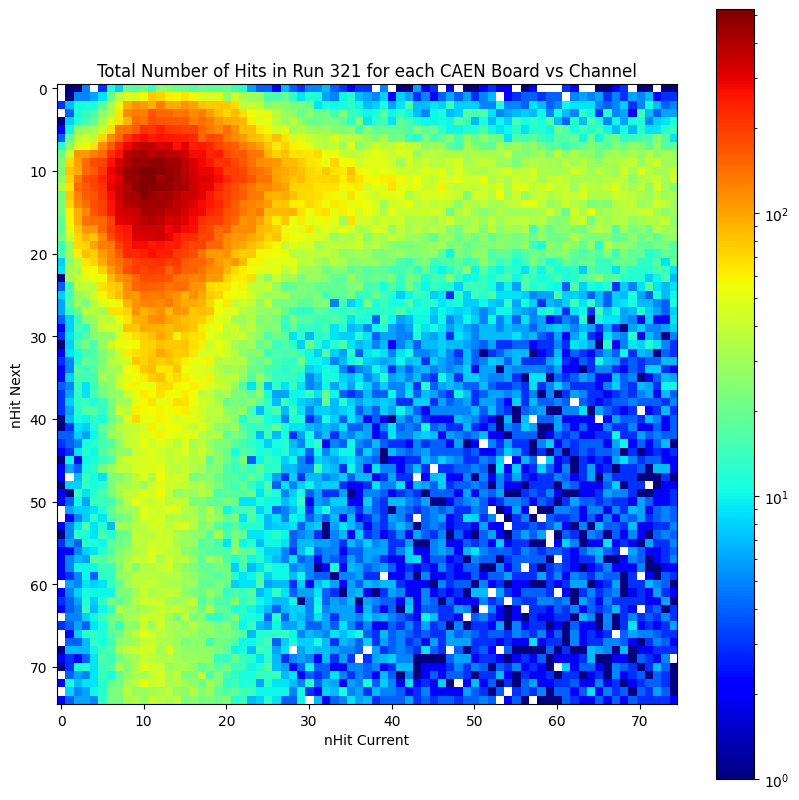

In [19]:
NHits_CurrentNext = np.zeros([75,75],int)

for iEvt in range(0,len(event_number)-1):
    if(nhit[iEvt] < 75 and nhit[iEvt+1]<75):
        NHits_CurrentNext[nhit[iEvt],nhit[iEvt+1]]+=1

plt.figure(figsize=(10,10))
plt.imshow(NHits_CurrentNext, cmap='jet',norm=colors.LogNorm())
plt.title("Total Number of Hits in Run "+run_number+" for each CAEN Board vs Channel")
plt.xlabel("nHit Current")
plt.ylabel("nHit Next")
plt.colorbar()
plt.show()

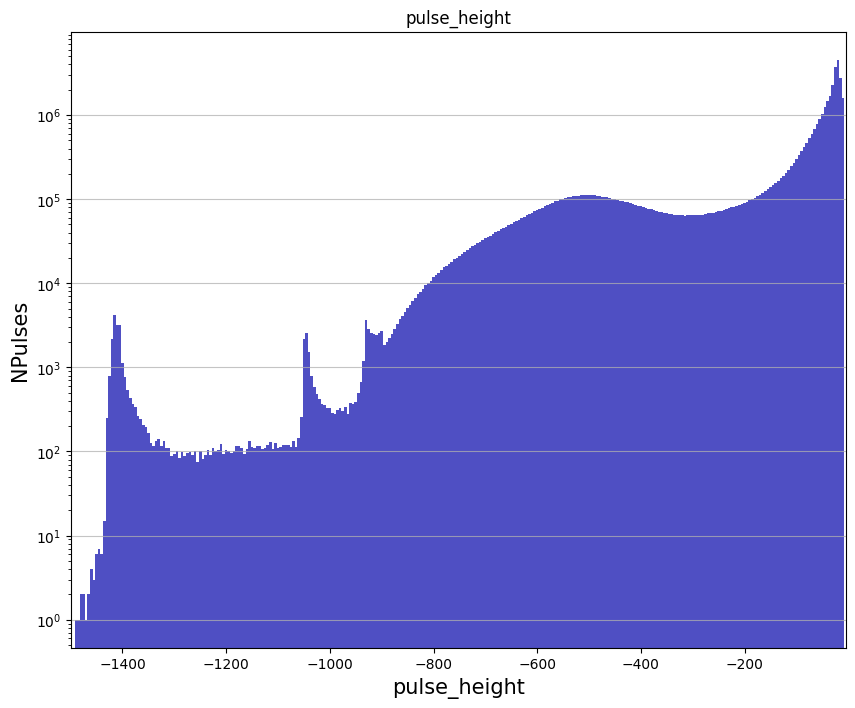

In [9]:
pulse_height_list = []
for iEvt in range(0,len(event_number)):
    for iPulse in range(0,len(pulse_height[iEvt])):
        pulse_height_list.append(pulse_height[iEvt][iPulse])
# Create histogram using numpy
hist, bin_edges = np.histogram(pulse_height_list, bins=np.arange(-1500,0,5))

# Plot histogram using matplotlib
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.title("pulse_height")
plt.xlabel('pulse_height',fontsize=15)
plt.ylabel('NPulses',fontsize=15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
plt.yscale("log")
plt.show()
